# Chapter 7: Statistical Testing – Concepts and Strategy



Let us begin with simple computations in Python using +,-,* and / operators and functions.

In [27]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


In [28]:
whiteside = pd.read_csv('../data/whiteside.csv')

## Basic Concepts

You can use the built-in series functions or explicitly call the numpy functions.

In [29]:
whiteside['Temp'].mean()

4.875

In [30]:
np.mean(whiteside['Temp'])

4.875

In [31]:
whiteside['Temp'].var()

7.560090909090909

In [32]:
np.var(whiteside['Temp'])

7.425089285714286

In [33]:
whiteside['Temp'].quantile(0.75)

7.125

In [34]:
np.quantile(whiteside['Temp'], 0.75)

7.125

In [35]:
# qnorm p=0.75, mean=5, std=7
stats.norm.ppf(0.75, loc=5, scale=7)

9.721428251372572

## The Strategy for Statistical Testing

## Permutation Design for Statistical Testing

## First Example

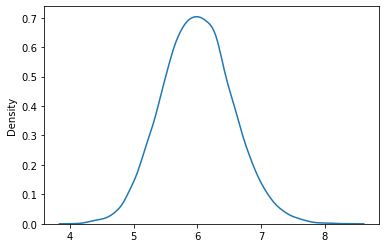

In [36]:
np.random.seed(87654321)
def f1():
    s1 = np.random.poisson(6, 20)
    return np.mean(s1)

sampdist = np.array([f1() for i in range(10000)])  # list comprehension

sampdist = []  # alternative: normal for loop
for i in range(10000):
    sampdist.append(f1())

# plot
sns.kdeplot(sampdist)
plt.show()


6.75


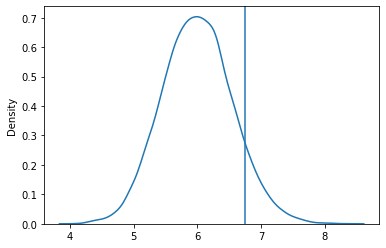

In [37]:
svalues = np.array([4, 3, 5, 13, 7, 10, 9, 9, 3, 6, 4, 3, 7, 10, 7, 6, 7, 8, 7, 7])
tstat = np.mean(svalues)
print(tstat)

sns.kdeplot(sampdist)
plt.axvline(tstat)
plt.show()


## P Values

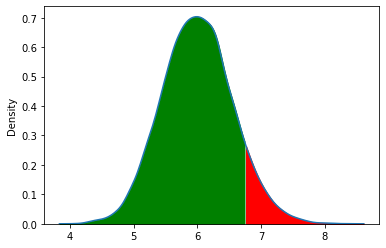

In [38]:
points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
x = points[0]
y = points[1]

plt.fill_between(x,y, where = x >= tstat, color='r')
plt.fill_between(x,y, where = x < tstat, color='g')
plt.show()

In [39]:
# calculate p value   
pvalue = np.sum(sampdist > tstat) / len(sampdist)
print(pvalue)   # small variation in pvalue due to sampling


0.0821


## Tale of Tails

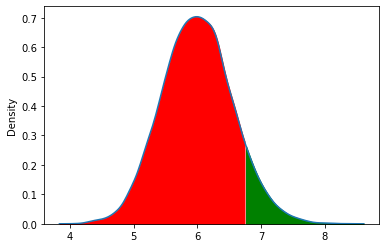

In [40]:
points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
x = points[0]
y = points[1]

plt.fill_between(x,y, where = x < tstat, color='r')
plt.fill_between(x,y, where = x >= tstat, color='g')
plt.show()

In [41]:
# calculate p value
pvalue = np.sum(sampdist < tstat) / len(sampdist)
print(pvalue)   # small variation in pvalue due to sampling

0.9049


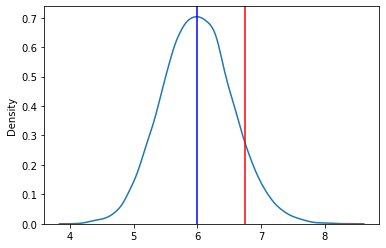

In [42]:
sns.kdeplot(sampdist)
plt.axvline(6, color='b')
plt.axvline(tstat, color='r')
plt.show()

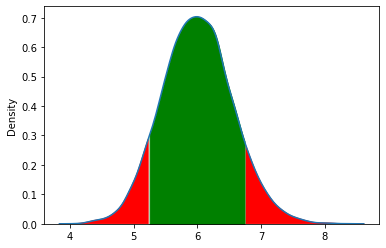

In [43]:
hyp = np.mean(sampdist)
cutoff1 = hyp - np.abs(hyp - tstat)
cutoff2 = hyp + np.abs(hyp - tstat)

points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
x = points[0]
y = points[1]

plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r')
plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g')
plt.show()

In [44]:
# calculate pvalue
pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist)
print(pvalue)   # small variation in pvalue due to sampling

0.1744


## Creating Functions to Compute p values

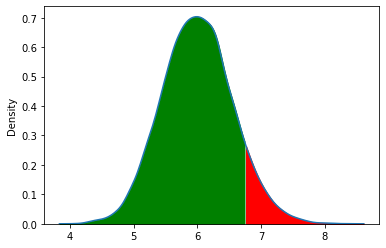

0.9049

In [46]:
def p_rtail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = x > tstat, color='r')
    plt.fill_between(x,y, where = x <= tstat, color='g')
    plt.show()
    
    pvalue = np.sum(sampdist < tstat) / len(sampdist)
    return pvalue
p_rtail(sampdist, tstat)

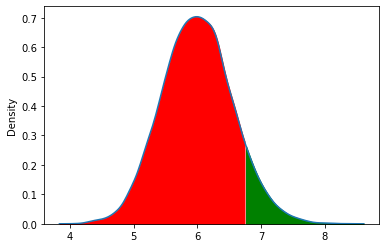

0.0821

In [45]:
def p_ltail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data()
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = x < tstat, color='r')
    plt.fill_between(x,y, where = x >= tstat, color='g')
    plt.show()
    
    pvalue = np.sum(sampdist > tstat) / len(sampdist)
    return pvalue
p_ltail(sampdist, tstat)

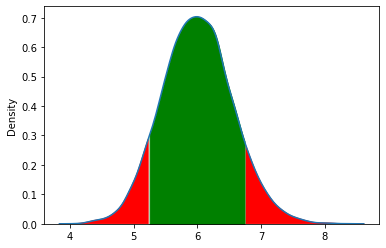

0.1744

In [47]:
def p_2tail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r')
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g')
    plt.show()
    
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist)
    return pvalue
p_2tail(sampdist, tstat)

## Confidence Intervals

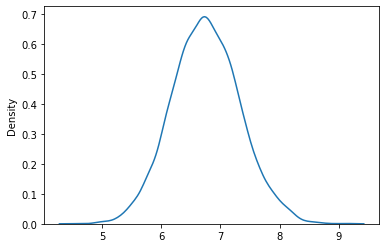

In [48]:
np.random.seed(87654321)
v1 = np.array([4,3,5,13,7,10,9,9,3,6,4,3,7,10,7,6,7,8,7,7])

def f1():
  s1 = np.random.poisson(np.mean(v1), 20)
  return np.mean(s1)

sampdist = np.array([f1() for i in range(10000)])  # list comprehension
sns.kdeplot(sampdist)
plt.show()

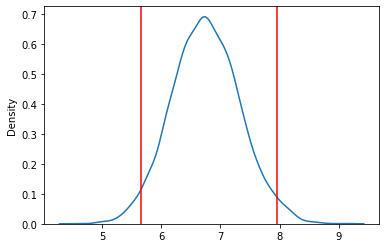

[5.65,7.95]


In [49]:
q1 = np.quantile(sampdist, [.05/2, 1-(.05/2)])
sns.kdeplot(sampdist)
plt.axvline(q1[0], color='r')
plt.axvline(q1[1], color='r')
plt.show()
ouput = "[" + str(q1[0]) + "," + str(q1[1]) + "]"
print(ouput)

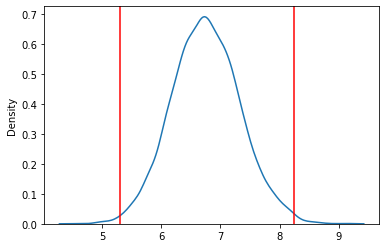

'[5.3,8.25]'

In [50]:
def conf_int(sampdist, conlevel=0.95):
    left_v = (1-conlevel)/2
    right_v = 1-left_v
    q1 = np.quantile(sampdist, [left_v, right_v])
    sns.kdeplot(sampdist)
    plt.axvline(q1[0], color='r')
    plt.axvline(q1[1], color='r')
    plt.show()
    output = "[" + str(q1[0]) + "," + str(q1[1]) + "]"
    return output
conf_int(sampdist, 0.99)

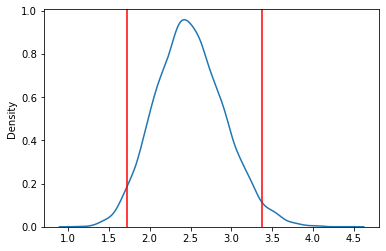

'[1.7168284713389397,3.3705618366707637]'

In [51]:
np.random.seed(87654321)
def f2():
    s2 = np.random.poisson(np.mean(v1), 20)
    return np.std(s2)
sampdist = np.array([f2() for i in range(10000)])  # list comprehension
conf_int(sampdist)

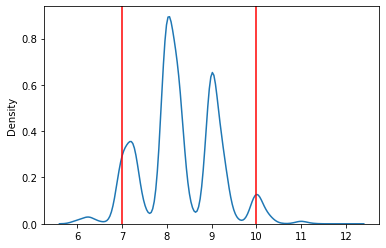

'[7.0,10.0]'

In [52]:
np.random.seed(87654321)
def f3():
    s3 = np.random.poisson(np.mean(v1), 20)
    return np.quantile(s3, .75)
sampdist = np.array([f3() for i in range(10000)])  # list comprehension
conf_int(sampdist)